In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict

In [ ]:
!conda install airflow

In [1]:
#packages

import os
from pathlib import Path

import csv
import pandas as pd
import datetime as DT #to get age value
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

#regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

PATH = str(Path(os.getcwd()).parent)


In [2]:
type(PATH)

str

In [3]:
#read in data
data1 = pd.read_csv(PATH+"/Data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")


In [4]:
data1.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,133957.0,...,329919.0,329699.0,329320.0,329442.0,330733.0,332540.0,334662.0,336913.0,338800.0,341125.0
1,112345,1,Maryvale,Neighborhood,AZ,AZ,Phoenix,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,...,190873.0,192848.0,194789.0,197094.0,199738.0,202351.0,204756.0,207493.0,210739.0,214674.0
2,192689,2,Paradise,Neighborhood,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,135858.0,...,260933.0,261867.0,262567.0,264458.0,266139.0,267250.0,267744.0,269076.0,271727.0,275313.0
3,270958,3,Upper West Side,Neighborhood,NY,NY,New York,New York-Newark-Jersey City,New York County,226951.0,...,1121653.0,1121390.0,1116455.0,1106338.0,1106268.0,1105694.0,1105580.0,1111979.0,1118736.0,1126443.0
4,118208,4,South Los Angeles,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,133922.0,...,518675.0,522589.0,527759.0,533182.0,537938.0,540725.0,544009.0,549893.0,558240.0,567059.0


In [5]:
data1.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
       '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
      dtype='object', length=306)

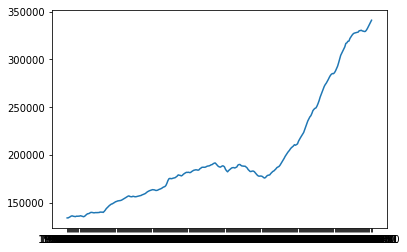

In [7]:
plt.plot(data1.iloc[0,9:])
plt.show()

In [ ]:
stats.describe(data1.RegionID)

In [ ]:
np.percentile(freq_visited_data.h1_r1,50)

In [ ]:
grindhouse_visitors.head()

In [ ]:
grindhouse_visitors.venue_name.unique()

In [ ]:
all_visitors.head()

In [ ]:
grindhouse_visitors.shape

In [ ]:
grindhouse_visitors.columns

In [ ]:
all_visitors.shape

In [ ]:
all_visitors.columns

In [ ]:
grindhouse_maids=grindhouse_visitors.maid.unique()
grindhouse_maids.shape

In [ ]:
type(grindhouse_maids)

In [ ]:
all_visitors['matched']=np.where(df.maid ==)

In [ ]:
grindhouse_POI = all_visitors[all_visitors['maid'].isin(grindhouse_maids)].copy()

In [ ]:
grindhouse_POI.shape

In [ ]:
grindhouse_POI.maid.nunique()

# ^ 2136 maids to work with, and our dataset is __

In [ ]:
maid_observation_counts = grindhouse_POI.maid.value_counts()
maid_observation_counts.to_csv('maid_observation_counts.csv')
maid_observation_counts.head()

In [ ]:
np.percentile(maid_observation_counts.values,75)

In [ ]:
stats.describe(maid_observation_counts.values)

In [ ]:
grindhouse_maids.shape

In [ ]:
all_visitors_maids = all_visitors.maid.unique()
all_visitors_maids.shape

In [ ]:
#all_visitors_maids = all_visitors.maid.unique().reshape((1,-1))
#grindhouse_maids.reshape((1,-1))
check1 = np.concatenate((grindhouse_maids,all_visitors_maids))

In [ ]:
np.unique(check1).size
#This should be equal to grindhouse_POI.maid.nunique() ---which is 2136

In [ ]:
grindhouse_POI[['cat1','cat2','cat3']] = grindhouse_POI.poi_categories.str.split(":",n=2,expand=True)

In [ ]:
cat1_counts = grindhouse_POI.cat1.value_counts()

In [ ]:
cat1_counts

In [ ]:
type(cat1_counts)

In [ ]:
cat1_counts.to_csv('cat1_counts.csv')

In [ ]:
plt.scatter(cat1_counts.values, cat1_counts.index, alpha=0.9)

plt.rcParams["figure.figsize"] = [10,20]
plt.gca().invert_yaxis()

plt.savefig('plot2.png',dpi=100)

In [ ]:
cat2items=grindhouse_POI[grindhouse_POI['cat1']=='restaurants']['cat2']

In [ ]:
cat2counts = cat2items.value_counts()
cat2counts.to_csv('cat2_counts.csv')

In [ ]:
plt.scatter(cat2counts.values, cat2counts.index, alpha=0.9)

plt.rcParams["figure.figsize"] = [10,20]
plt.gca().invert_yaxis()

plt.savefig('plot3.png',dpi=100)

In [ ]:
cat2items[33]